In [3]:
from  sklearn.neural_network import MLPClassifier
import numpy as np
import  gym
import pandas as pd
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
print("[+] Done")

[+] Done


<h2>Introduction </h2>
This project will use Q-learning techniques to solve a simpled Open AI gym game, the Frozen Lake Game.

The basic idea of this game is that you want to get from S to G without running into any of the holes in the ice marked by H. The ice also has a probability of making you go a different direction than the one you inputted, as if you were to "slip" on the ice. 

In [4]:
env = gym.make('FrozenLake-v0')

actions = env.action_space.n
observations = env.observation_space.n

In [5]:
def demo():
    obs = env.reset()
    while True:
        env.render()
        clear_output(wait=True)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        time.sleep(.3)
        if done:
            env.render()
            print("Done!")
            break
            
demo()

  (Left)
SFFF
FHFH
FFFH
HFFG
Done!


With no knowledge of the maze, most of the time it will not complete it corretcly, but through quasi exponential discounting (Shoutout behavioral economics) we can train the model to get better at completing the maze

In [6]:
states = np.zeros(observations * actions).reshape(observations,actions)
alpha = .6
num_trials = 10000
epsilon = 1
max_steps = 100
learn_rate = 0.002
scores = []


for train_iter in range(num_trials):
    observation =    env.reset()
    for t in range(max_steps):
        prev= observation
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(states[prev])
        
        observation, reward, done, info = env.step(action)
        states[prev][action] = (1-alpha) * states[prev][action] + alpha* (reward+.99 *states[observation].max())
        
        if done or t== 99:
            scores.append(reward)
            epsilon *= (1- learn_rate)
            break

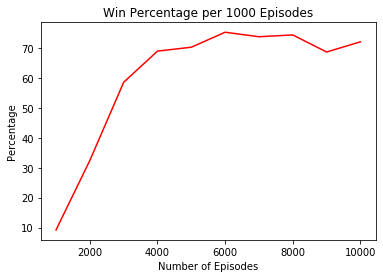

In [7]:
scores10 = []
X = [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
for i in range(0,len(scores),1000):
    scores10 .append(100*(np.mean(scores[i:i+999])))
plt.plot(X,scores10,'r')
plt.title("Win Percentage per 1000 Episodes")
plt.xlabel("Number of Episodes")
plt.ylabel("Percentage")
plt.show()

You can see that the model makes large jumps at first and then levels out, approaching a success rate in the mid 70s. Due to the random "slipping" in the puzzle, this is a good rate. Here is an example of our trained model playing the game

In [8]:
def demo2():
    for i in [1,2]:
        obs = env.reset()
        while True:
            env.render()
            clear_output(wait=True)
            action =np.argmax(states[prev])
            observation, reward, done, info = env.step(action)
            time.sleep(.3)
            if done:
                env.render()
                print("Done!")
                time.sleep(2)
                break
demo2()

  (Down)
SFFF
FHFH
FFFH
HFFG
Done!
